# Signals & Systems Project Phase1
### Kiarash Gheisari Pour , Radin Dehghan

---

### Question 1: Cross-Correlation of Signals

The correlation between two signals can be expressed as follows for discrete-time and continuous-time signals:

#### 🔹 Discrete-Time Cross-Correlation

$$
R_{xy}[k] = \sum_{n=-\infty}^{\infty} x[n] \cdot y[n + k]
$$

Where:

- $R_{xy}[k]$ is the cross-correlation at lag $k$  
- $x[n]$ is the first discrete-time signal  
- $y[n + k]$ is the second signal, shifted by $k$

---

#### 🔸 Continuous-Time Cross-Correlation

$$
R_{xy}(\tau) = \int_{-\infty}^{\infty} x(t) \cdot y(t + \tau) \, dt
$$

Where:

- $R_{xy}(\tau)$ is the cross-correlation at time lag $\tau$  
- $x(t)$ is the first continuous-time signal  
- $y(t + \tau)$ is the second signal, shifted by $\tau$

---

Cross-correlation is a mathematical operation that measures the similarity between two signals as a function of the time lag (or shift) applied to one of them. It is commonly used in signal processing for tasks such as pattern recognition and time delay estimation.

In fact, it can be mathematically shown that if we aim to design a **Linear Time-Invariant (LTI)** system that can detect or distinguish a specific signal from others, the system's response to the desired input should ideally be the **autocorrelation** of that signal (i.e., the correlation of the signal with itself).

This ensures that the output will exhibit a significant peak when the desired signal is present, and a lower response when other signals are input. In other words, the system can be configured such that it produces the autocorrelation output **only** for the intended input signal, effectively enhancing detection accuracy.

---

### Question 2: Cross-Correlation for Image Similarity (2D Signals)
####  Using 1D Normalized Cross-Correlation to Compare Image Segments

#####  Introduction

Normalized cross-correlation (NCC) is a method originally developed for comparing **1D signals**, such as audio or sensor data. However, its mathematical properties generalize well to **2D image segments**, enabling it to be used in tasks like template matching and character recognition.

---

#####  1D Normalized Cross-Correlation

For two 1D signals $x[n]$ and $y[n]$, the normalized cross-correlation at zero lag is defined as:

$$
\text{NCC}(x, y) = \frac{\sum_{n=1}^{N} (x[n] - \mu_x)(y[n] - \mu_y)}{\sqrt{\sum_{n=1}^{N} (x[n] - \mu_x)^2} \cdot \sqrt{\sum_{n=1}^{N} (y[n] - \mu_y)^2}}
$$

Where:

- $\mu_x$ and $\mu_y$ are the means of the signals.
- The numerator measures **covariance**.
- The denominator normalizes by the **standard deviations**.

This yields a score in the range $[-1, 1]$, where:

- $1$ indicates perfect similarity,
- $0$ indicates no correlation,
- $-1$ indicates inverse similarity.

---

##### Extending to 2D Images

Images are 2D signals — grids of pixel intensity values. To compare two image patches $A$ and $B$ of the same shape $H \times W$, we apply the same formula over all pixels:

$$
\text{NCC}(A, B) = \frac{\sum_{i=1}^{H} \sum_{j=1}^{W} (A_{i,j} - \mu_A)(B_{i,j} - \mu_B)}{\sqrt{\sum_{i,j} (A_{i,j} - \mu_A)^2} \cdot \sqrt{\sum_{i,j} (B_{i,j} - \mu_B)^2}}
$$

Where:

- $\mu_A$ and $\mu_B$ are the mean intensities of patches $A$ and $B$.

This is essentially **flattening** the image patches and applying 1D NCC on the resulting vectors.

---

##### Masked NCC for Sparse Image Comparison

In real images, especially binary or sparse ones (e.g., black text on white background), many regions may contain only background (zeros). To avoid comparing meaningless areas, we apply a **mask**:

$$
M_{i,j} = \begin{cases}
1 & \text{if } A_{i,j} + B_{i,j} > 0 \\
0 & \text{otherwise}
\end{cases}
$$

We then define **masked NCC** as:

$$
\text{NCC}_{\text{masked}}(A, B) = \frac{\sum_{i,j} M_{i,j}(A_{i,j} - \mu_A)(B_{i,j} - \mu_B)}{\sqrt{\sum_{i,j} M_{i,j}(A_{i,j} - \mu_A)^2} \cdot \sqrt{\sum_{i,j} M_{i,j}(B_{i,j} - \mu_B)^2}}
$$

Where $\mu_A$ and $\mu_B$ are computed **only over the masked (non-zero) pixels**.

---

##### Why It Works for Images

Although NCC is a 1D method, its core principle — comparing **normalized variation** — applies equally well to 2D signals. In image processing:

- Pixel intensities behave like time samples in 1D signals.
- NCC detects **similar spatial patterns**, even when brightness levels differ.
- Masking ensures robustness to irrelevant regions (e.g., background).

---

### Question 3: 
### Applying a 1D IIR Filter to a 2D Image

In this project, the images we deal with are blurred and can be modeled as passing through a filter with the following transfer function:

$$
H(z) = \frac{1 - p}{1 - p z^{-1}}
$$

This is a first-order recursive filter (IIR), often used for smoothing or modeling simple blur. To extend this 1D filter for processing 2D images, we apply the filter **separately along each dimension**:

1. **Horizontal Filtering (Rows):**

$$
y[i, j] = (1 - p) \cdot x[i, j] + p \cdot y[i, j - 1]
$$

2. **Vertical Filtering (Columns):**

$$
y[i, j] = (1 - p) \cdot y[i, j] + p \cdot y[i - 1, j]
$$

This approach is known as **separable filtering**, and it allows a 1D filter to be efficiently extended to 2D applications.

By applying the filter in this way, we can simulate or reverse certain types of blurring that occur in real-world imaging systems — especially useful for applications like license plate recognition, where image clarity is critical for accurate detection.

### Question 4: 

### Can We Recover the Original Image from a Blurred One?

Yes, it is theoretically possible to recover the original high-quality image from a blurred image using a process known as **deblurring** or **deconvolution**.

In our case, the blurring is modeled by an IIR filter with the transfer function:

$$
H(z) = \frac{1 - p}{1 - p z^{-1}}
$$

To reverse the effect of the blur, we can apply the **inverse filter**:

$$
X(z) = \frac{Y(z)}{H(z)}
$$

Where:

- $X(z)$ is the original signal (or image)  
- $Y(z)$ is the blurred image  
- $H(z)$ is the known blur function

However, direct inverse filtering is often unstable and highly sensitive to noise, especially when $H(z)$ has small values (close to zero).

---

#### 🧠 Practical Deblurring Methods

1. **Inverse Filtering**  
   Removes blur but very sensitive to noise. Rarely used alone in real-world applications.

2. **Wiener Filtering**  
   A more robust method that balances deblurring with noise suppression. It estimates the original image using statistical information about the signal and noise.

3. **Blind Deconvolution**  
   Used when the blur function is unknown. These methods estimate both the original image and the blur kernel simultaneously, often using iterative or learning-based approaches.

---

In practice, perfect image recovery is rarely possible, but with appropriate filtering techniques and assumptions, a significantly clearer version of the original image can often be reconstructed.



## Workflow Overview

### 1. **Template Preparation**
- Letter (`A–Z`) and number (`0–9`) templates are loaded from folders.
- Each template is:
  - Converted to grayscale
  - Thresholded using the mean pixel intensity
  - Centered and resized to a fixed size (40×40) for uniform alignment

### 2. **License Plate Preprocessing**
- Plate images (`p1.jpg` to `p4.jpg`) are read, then cropped with fixed margins to isolate characters.
- Each cropped plate is binarized similarly to templates.
- Characters are segmented by fixed fractional vertical cuts specific to each plate.

### 3. **Character Alignment and Normalization**
- Each segmented character is thresholded, then centered and resized to 40×40 pixels.
- This standardization is critical for consistent template matching.

### 4. **Template Matching via Masked Normalized Cross-Correlation (NCC)**
- Masked NCC computes a scalar similarity score between each candidate character and templates.
- The mask ignores background pixels to improve robustness.
- For character position 3, only letter templates are compared; for others, only number templates are used.
- The template with the highest NCC score is selected as the recognized character.

### 5. **Downsampling Robustness Analysis**
- The `p1.jpg` plate is downsampled by various factors (2, 4, 6, 8, 10, 12).
- Each downsampled image is upscaled back to the original size with nearest neighbor interpolation.
- Recognition is repeated at each scale to evaluate accuracy degradation.
- The minimum downsampling rate preserving correct recognition is identified.

---

## Key Techniques

- **Fixed fractional vertical cuts** segment characters based on plate layout knowledge, avoiding dynamic segmentation complexity.
- **Center alignment** ensures that characters are spatially normalized, improving NCC matching.
- **Masked NCC** calculates similarity by considering only foreground pixels, reducing noise influence.
- **Separate template sets** for letters and digits improve classification accuracy by limiting candidate pools.

---

## Notes

- The method assumes clean, well-aligned images with consistent character spacing.
- The downsampling experiment highlights the resolution limit for reliable recognition.




In [6]:
import os
import cv2
import numpy as np


# Read and convert image to grayscale
def read_gray(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)

# Crop image using top, bottom, left, right margins
def crop(img, t=0, b=0, l=0, r=0):
    return img[t:img.shape[0]-b, l:img.shape[1]-r]

# Threshold image using mean intensity
def threshold(img):
    return (img < np.mean(img)).astype(np.uint8)

# Center and resize binary image to fixed size
def center_align(img_bin, size=(40, 50)):
    ys, xs = np.nonzero(img_bin)
    if len(xs) == 0 or len(ys) == 0:
        return np.zeros(size, dtype=np.uint8)

    cx, cy = np.mean(xs).astype(int), np.mean(ys).astype(int)
    h, w = img_bin.shape
    canvas = np.zeros((h*2, w*2), dtype=np.uint8)
    y0, x0 = h - cy, w - cx
    canvas[y0:y0+h, x0:x0+w] = img_bin

    ys, xs = np.nonzero(canvas)
    x1, y1, x2, y2 = xs.min(), ys.min(), xs.max()+1, ys.max()+1
    cropped = canvas[y1:y2, x1:x2]

    h, w = cropped.shape
    scale = min(size[0]/h, size[1]/w)
    new_h, new_w = int(h*scale), int(w*scale)
    temp = cv2.resize(cropped, (new_w, new_h), interpolation=cv2.INTER_NEAREST)

    resized = np.zeros(size, dtype=np.uint8)
    y_offset = (size[0] - new_h) // 2
    x_offset = (size[1] - new_w) // 2
    resized[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = temp
    return resized

# Segment image using 6 fractional cuts into 7 parts
def segment_by_cuts(img, cuts):
    assert len(cuts) == 6
    h, w = img.shape
    cut_cols = [int(c * w) for c in sorted(cuts)]
    cut_cols = [0] + cut_cols + [w]
    return [img[:, cut_cols[i]:cut_cols[i+1]] for i in range(7)]

# Normalized cross-correlation with masking
def ncc_masked(a, b):
    a = a.astype(np.float32)
    b = b.astype(np.float32)
    mask = (a + b) > 0
    if np.sum(mask) == 0:
        return -1
    mean_a, mean_b = np.mean(a[mask]), np.mean(b[mask])
    num = np.sum((a[mask] - mean_a) * (b[mask] - mean_b))
    denom = np.sqrt(np.sum((a[mask] - mean_a)**2) * np.sum((b[mask] - mean_b)**2)) + 1e-6
    return num / denom

# Load templates from folder
def load_templates(folder):
    templates = {}
    for file in os.listdir(folder):
        if file.lower().endswith(('.jpg', '.png')):
            label = os.path.splitext(file)[0]
            img = read_gray(os.path.join(folder, file))
            img = crop_and_pad_bw_image(img)
            bin_img = threshold(img)
            processed = center_align(bin_img)
            templates[label] = processed
    return templates

def crop_and_pad_bw_image(image, threshold=5, min_consecutive=5, padding=5):
    """
    Crop a black-and-white image to remove leading/trailing white columns,
    ensuring at least one row has `min_consecutive` consecutive black pixels in the column.
    Then, add `padding` white columns on both sides.
    
    Args:
        image (numpy.ndarray): Input image (2D array, 0=black, 255=white).
        threshold (int): Value below which a pixel is considered black (default: 128).
        min_consecutive (int): Required consecutive black pixels in a row (default: 5).
        padding (int): Number of white columns to add on each side (default: 5).
    
    Returns:
        numpy.ndarray: Processed image.
    """
    if len(image.shape) > 2:
        raise ValueError("Image must be grayscale (2D array).")
    
    height, width = image.shape

    # Find first column with >= `min_consecutive` consecutive black pixels in any row
    first_col = None
    for col in range(width):
        for row in range(height):
            # Check if the next `min_consecutive` pixels (including current) are black
            if col + min_consecutive <= width:
                window = image[row, col:col + min_consecutive]
                if np.all(window < threshold):
                    first_col = col
                    break
        if first_col is not None:
            break

    # Find last column with >= `min_consecutive` consecutive black pixels in any row
    last_col = None
    for col in range(width - 1, -1, -1):
        for row in range(height):
            # Check if the previous `min_consecutive` pixels (including current) are black
            if col - min_consecutive + 1 >= 0:
                window = image[row, col - min_consecutive + 1:col + 1]
                if np.all(window < threshold):
                    last_col = col
                    break
        if last_col is not None:
            break

    # If no valid columns found, return original image with padding
    if first_col is None or last_col is None:
        print("Warning: No columns with 5 consecutive black pixels found.")
        return np.pad(image, ((0, 0), (padding, padding)), mode='constant', constant_values=255)

    # Crop the image
    cropped = image[:, first_col:last_col + 1]

    # Add padding
    padded = np.pad(
        cropped,
        ((0, 0), (padding, padding)),
        mode='constant',
        constant_values=255  # White padding
    )

    return padded


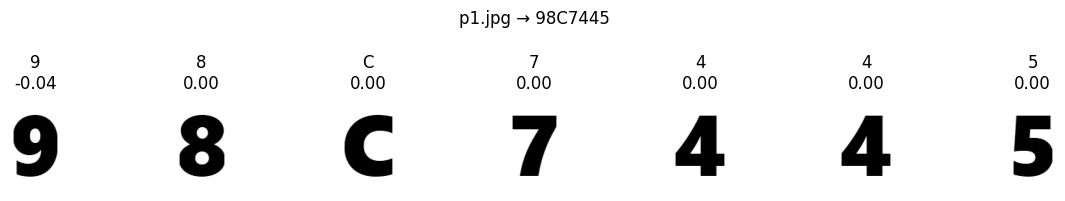

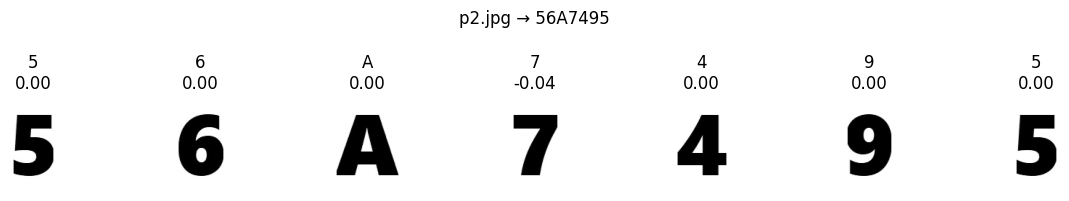

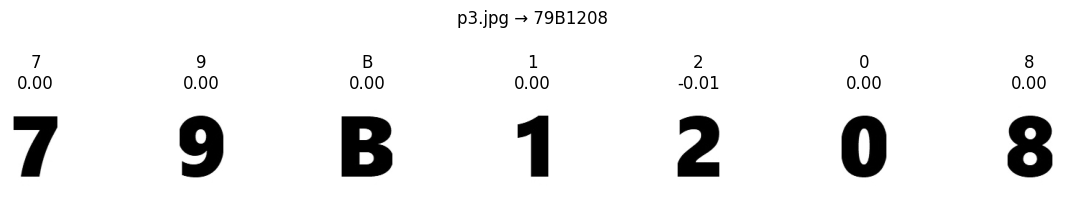

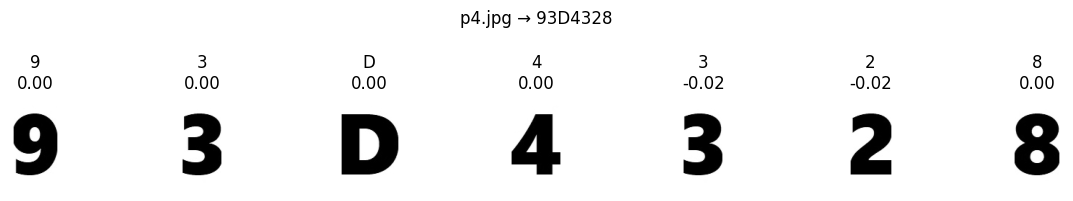

In [11]:
import matplotlib.pyplot as plt
# Cropping margins
CROP_SETTINGS = {'t': 20, 'b': 20, 'l': 100, 'r': 20}

# Plate-specific segmentation cut settings
cut_settings = {
    'p1': [0.17, 0.30, 0.46, 0.61, 0.73, 0.85],
    'p2': [0.15, 0.30, 0.46, 0.63, 0.75, 0.85],
    'p3': [0.17, 0.30, 0.46, 0.59, 0.71, 0.822],
    'p4': [0.15, 0.30, 0.46, 0.63, 0.73, 0.85],
}

# Load templates
letters = load_templates('letters')
numbers = load_templates('numbers')
templates = {**letters, **numbers}
# Recognize characters from p1–p4 using cut-based segmentation
for plate in ['p1', 'p2', 'p3', 'p4']:
    path = f'ideal/{plate}.jpg'
    img = read_gray(path)
    cropped = crop(img, **CROP_SETTINGS)
    segments = segment_by_cuts(cropped, cut_settings[plate])

    plt.figure(figsize=(12, 2))
    result = ''
    for j, ch in enumerate(segments):
        ch = crop_and_pad_bw_image(ch)
        bin_ch = threshold(ch)
        ch_prepped = center_align(bin_ch)

        best_score, best_char = -1, '?'
        candidate_set = letters if j == 2 else numbers

        for label, tmpl in candidate_set.items():
            score = ncc_masked(ch_prepped, tmpl)
            if score > best_score:
                best_score = score
                best_char = label

        result += best_char
        plt.subplot(1, 7, j+1)
        plt.imshow(ch, cmap='gray')
        plt.axis('off')
        plt.title(f'{best_char}\n{best_score:.2f}')

    plt.suptitle(f'{plate}.jpg → {result}')
    plt.tight_layout()
    plt.show()


--- Downsampling Analysis on p1.jpg ---



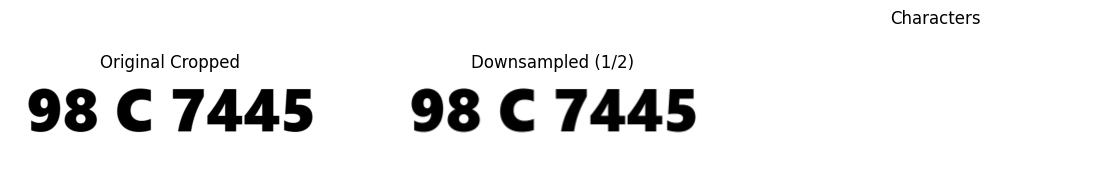

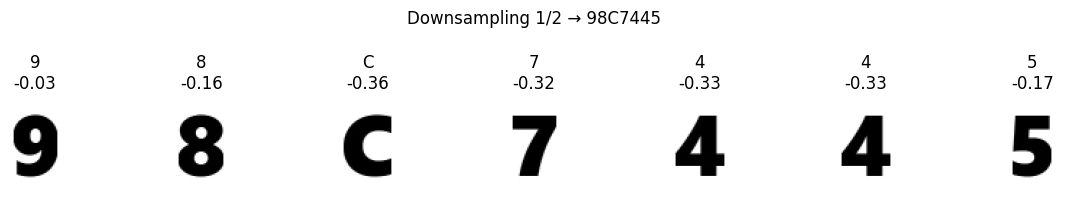

Downsample 1/2 → Recognized: 98C7445


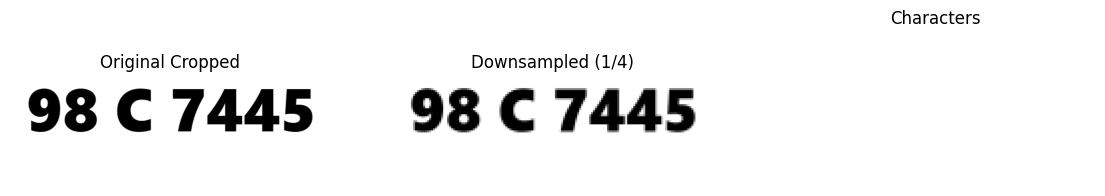

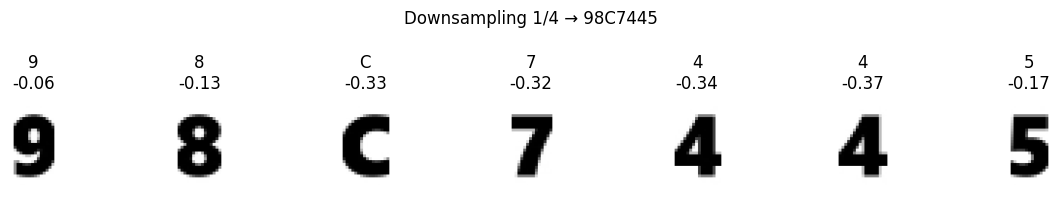

Downsample 1/4 → Recognized: 98C7445


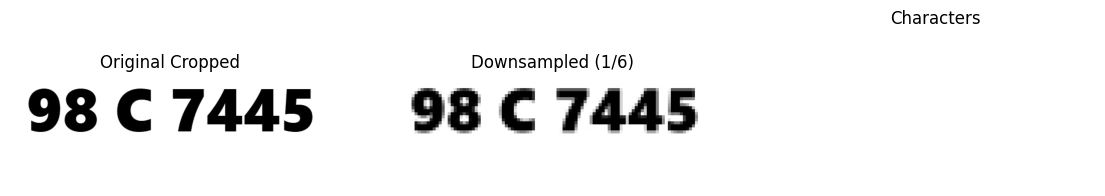

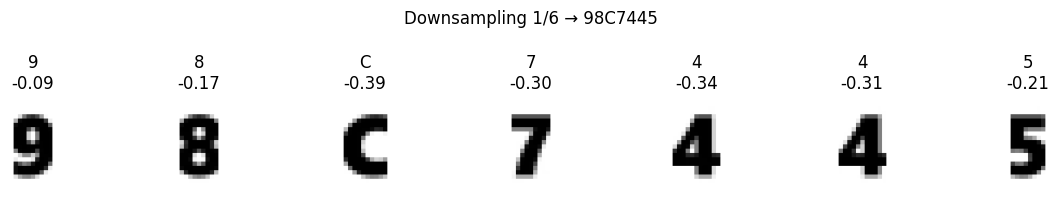

Downsample 1/6 → Recognized: 98C7445


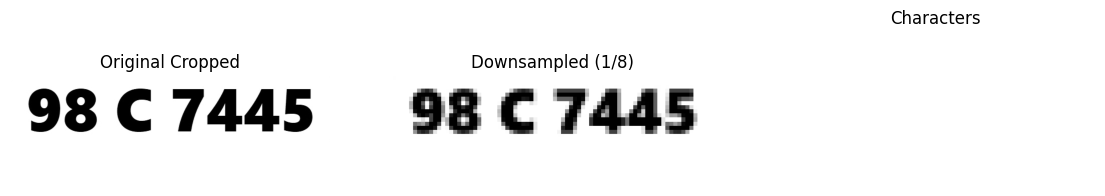

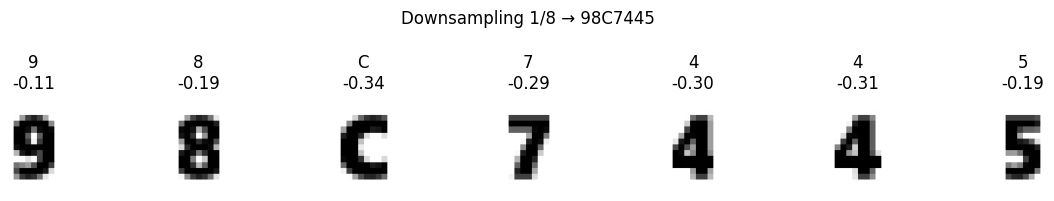

Downsample 1/8 → Recognized: 98C7445


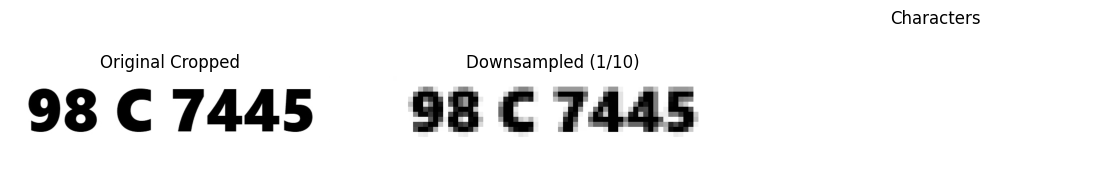

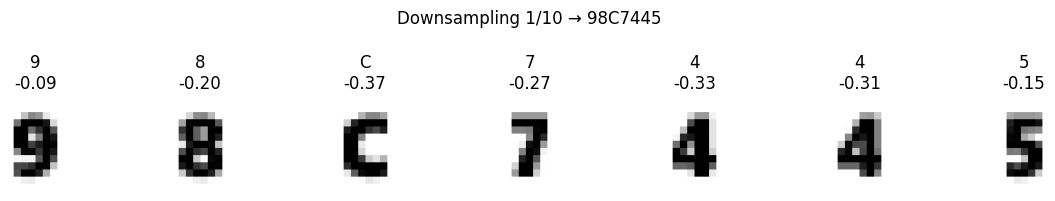

Downsample 1/10 → Recognized: 98C7445


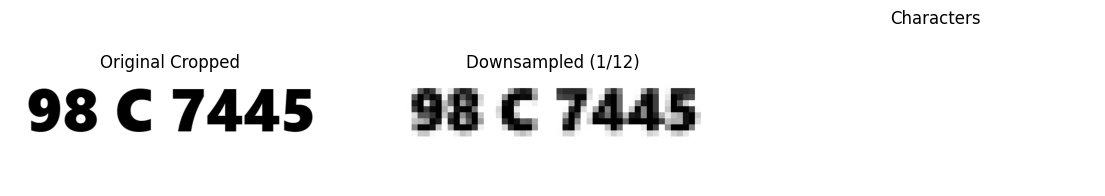

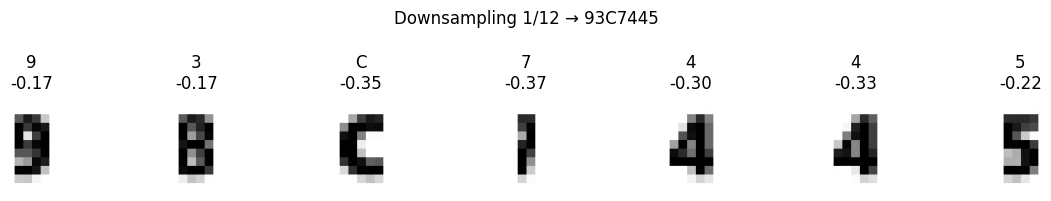

Downsample 1/12 → Recognized: 93C7445

--- Downsampling Analysis on p2.jpg ---



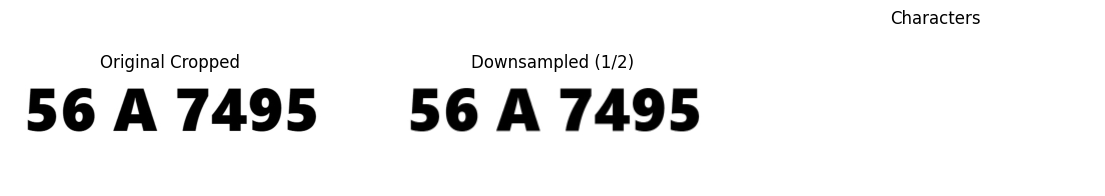

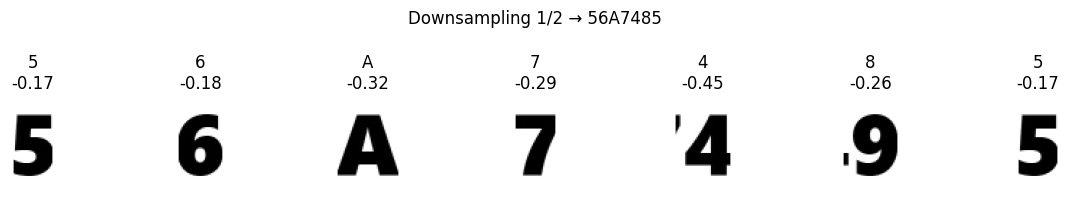

Downsample 1/2 → Recognized: 56A7485


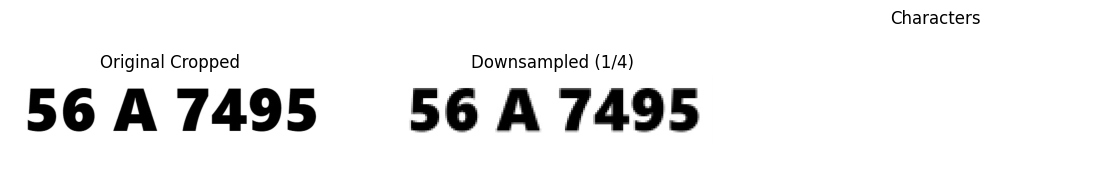

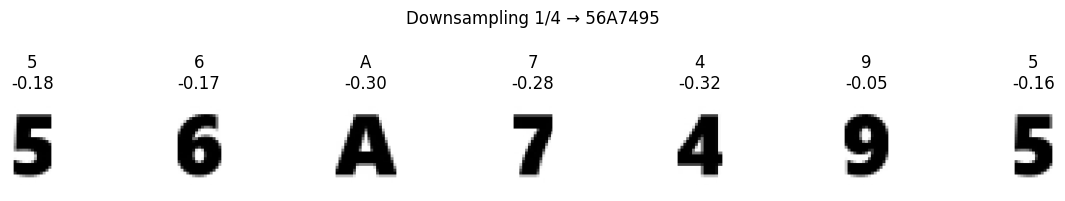

Downsample 1/4 → Recognized: 56A7495


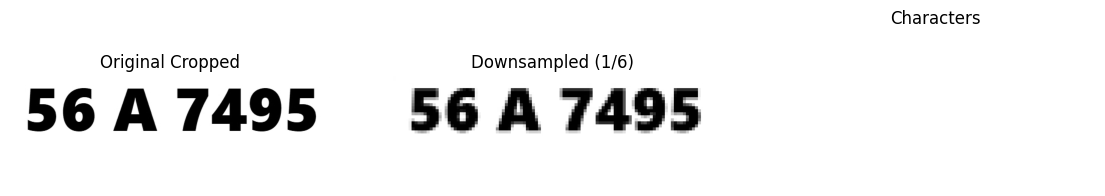

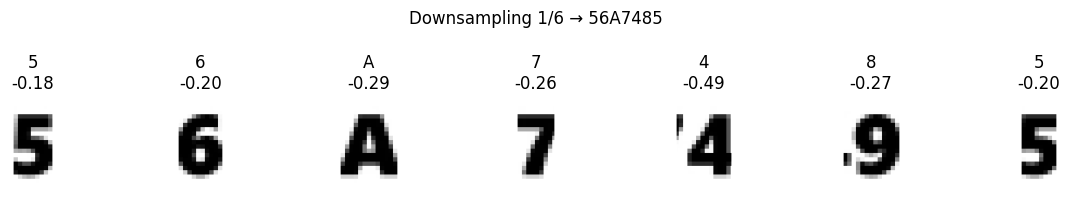

Downsample 1/6 → Recognized: 56A7485


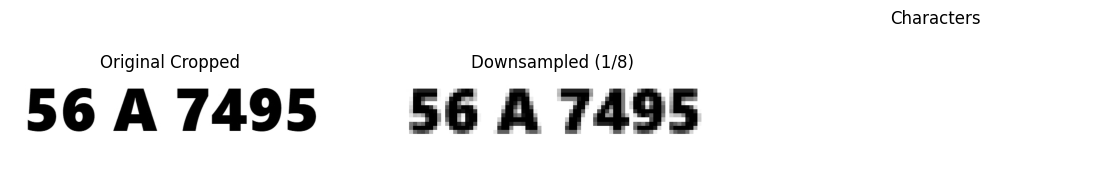

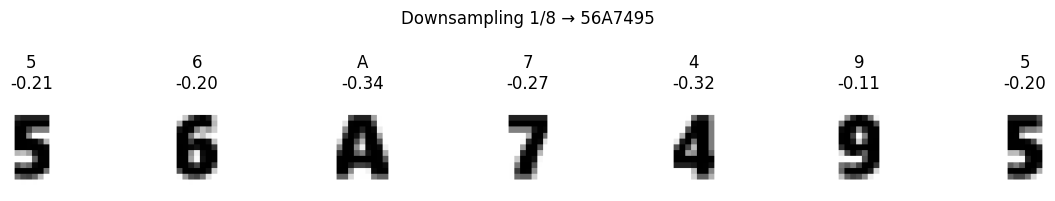

Downsample 1/8 → Recognized: 56A7495


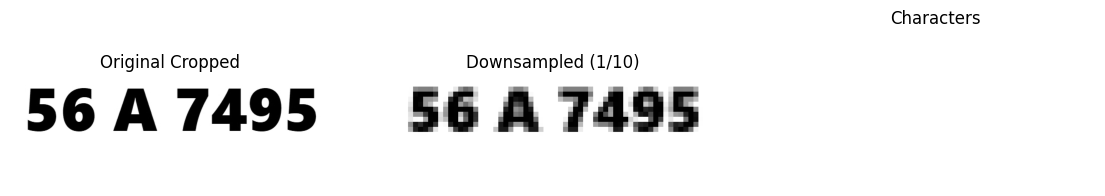

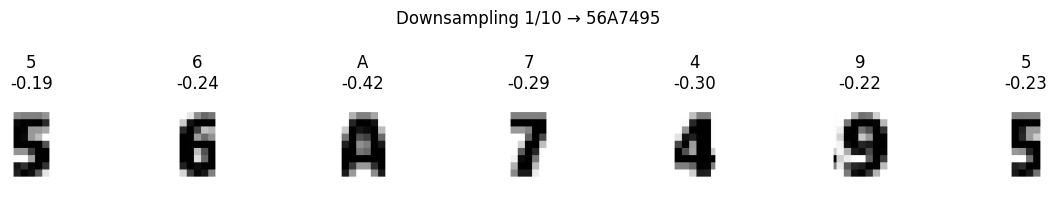

Downsample 1/10 → Recognized: 56A7495


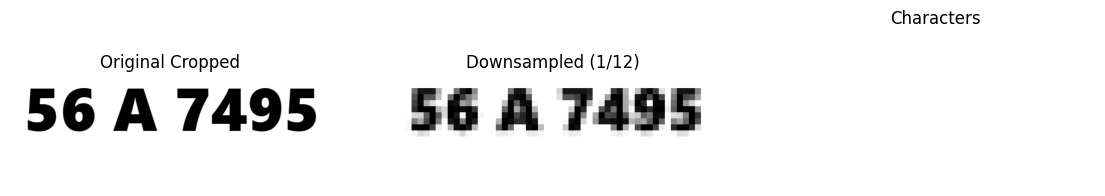

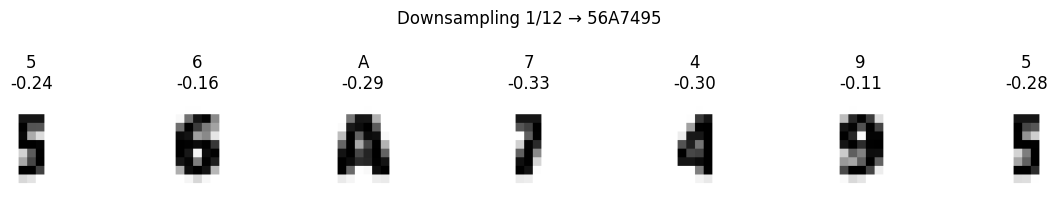

Downsample 1/12 → Recognized: 56A7495

--- Downsampling Analysis on p3.jpg ---



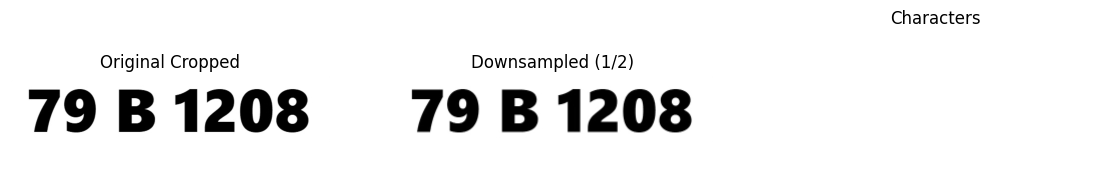

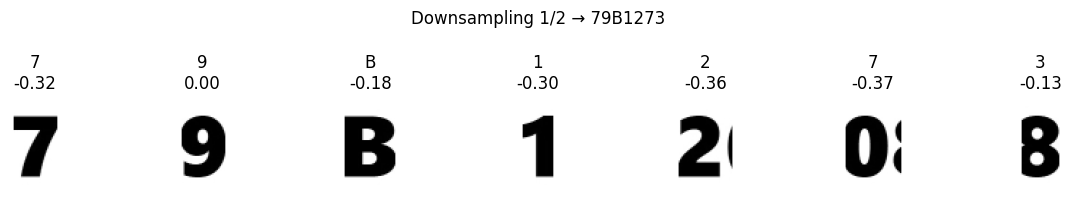

Downsample 1/2 → Recognized: 79B1273


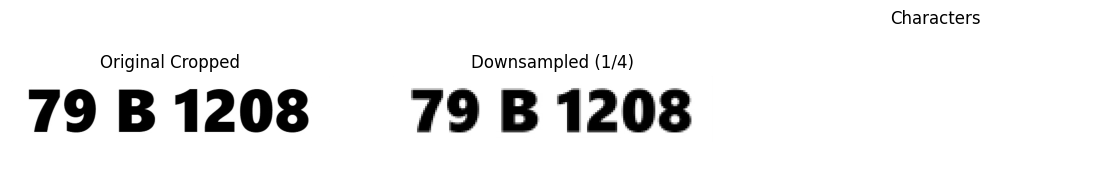

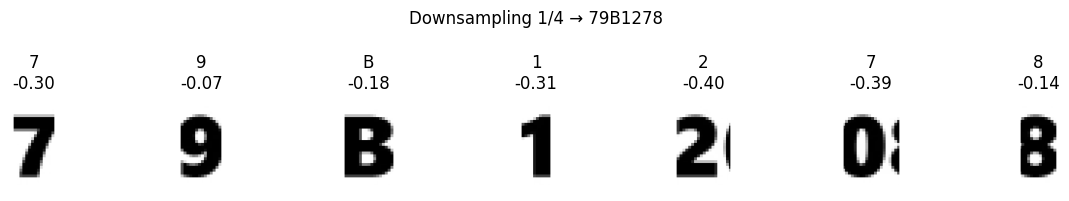

Downsample 1/4 → Recognized: 79B1278


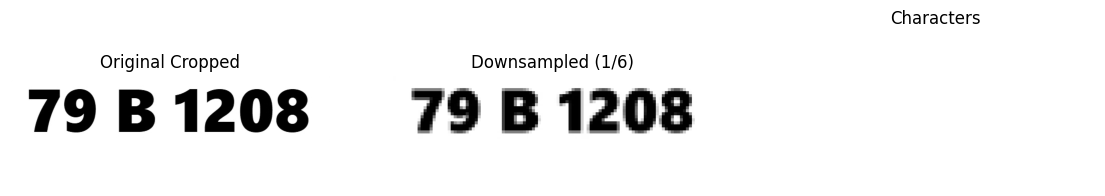

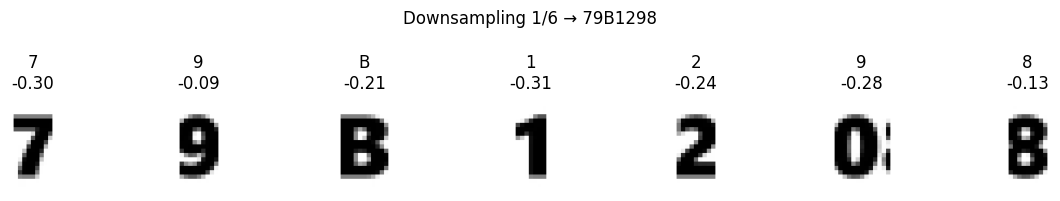

Downsample 1/6 → Recognized: 79B1298


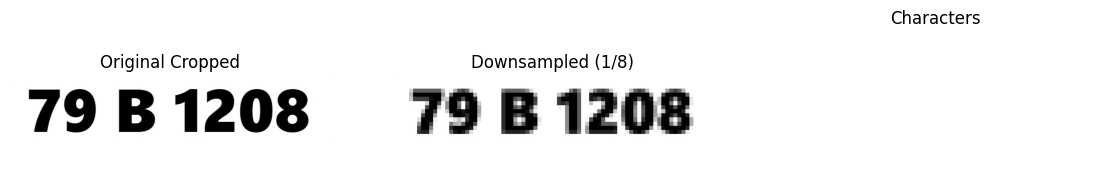

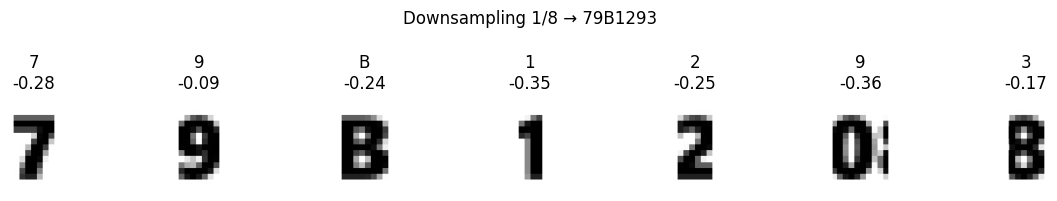

Downsample 1/8 → Recognized: 79B1293


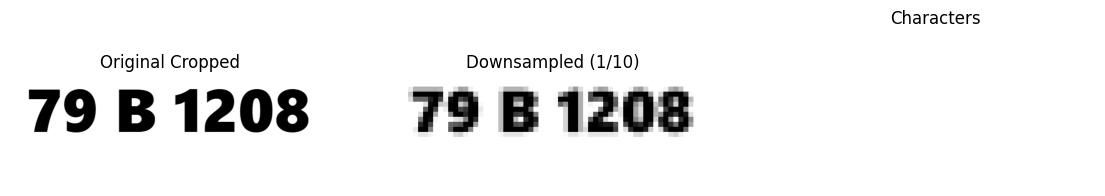

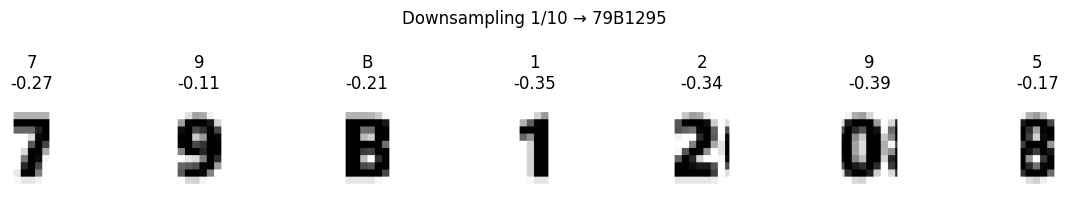

Downsample 1/10 → Recognized: 79B1295


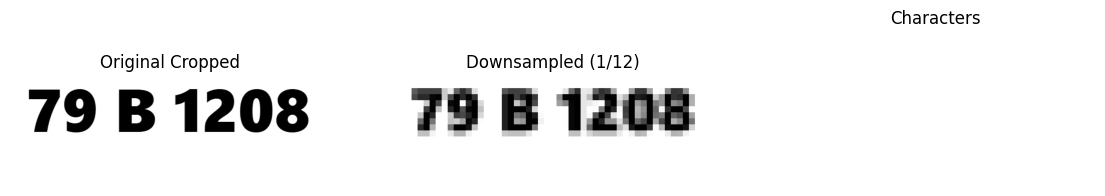

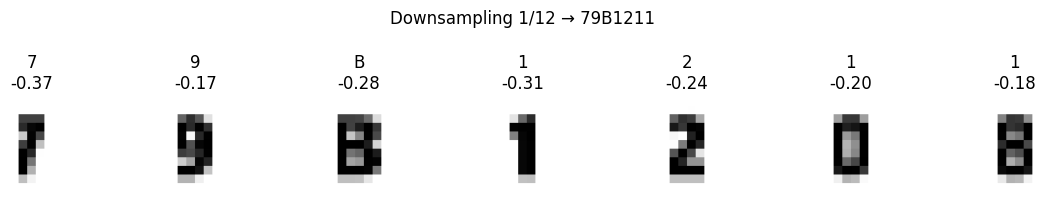

Downsample 1/12 → Recognized: 79B1211

--- Downsampling Analysis on p4.jpg ---



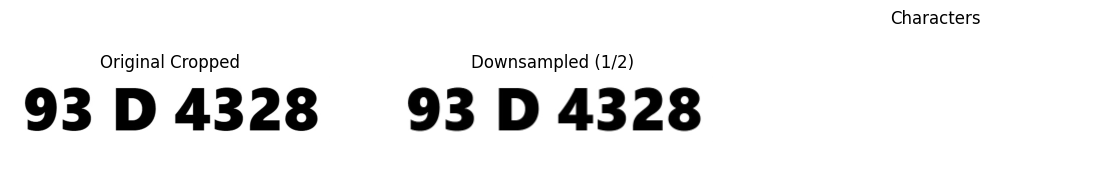

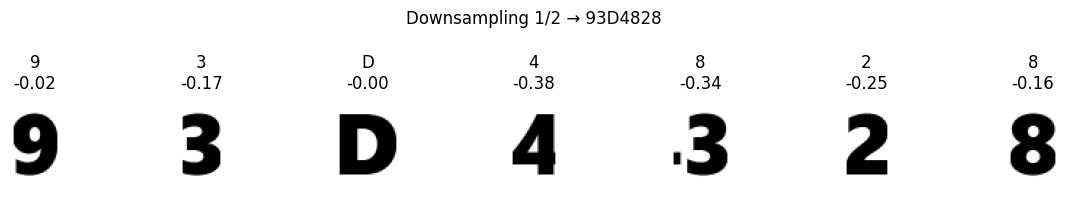

Downsample 1/2 → Recognized: 93D4828


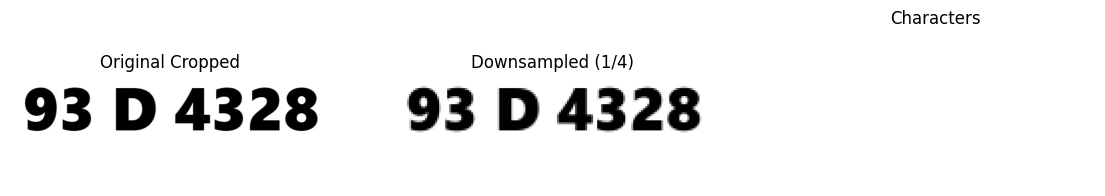

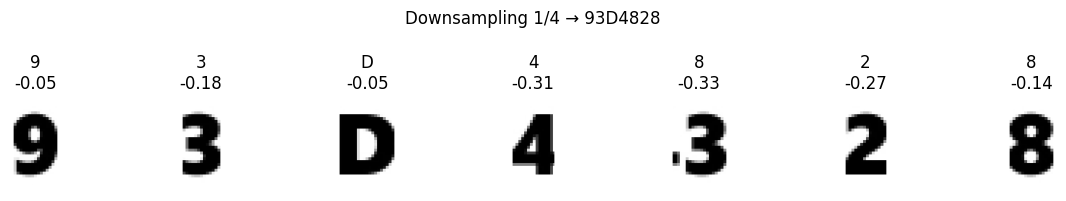

Downsample 1/4 → Recognized: 93D4828


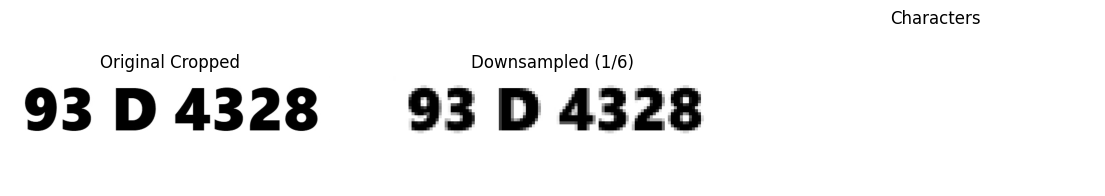

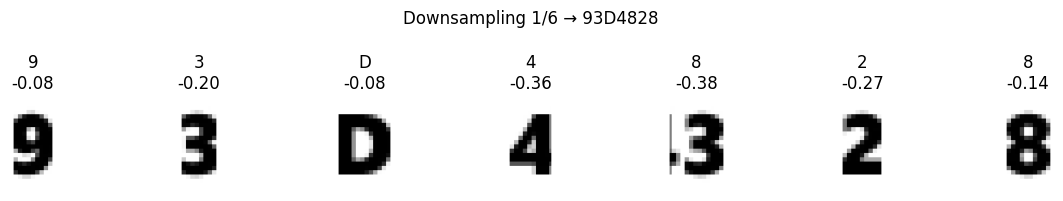

Downsample 1/6 → Recognized: 93D4828


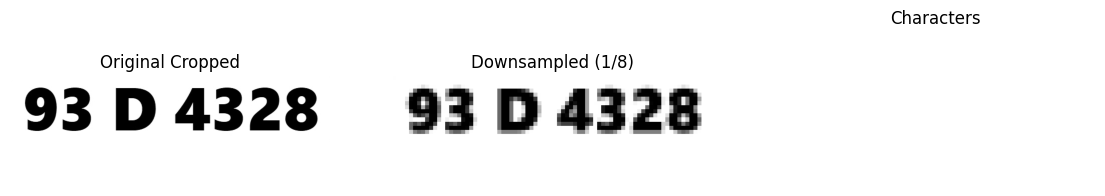

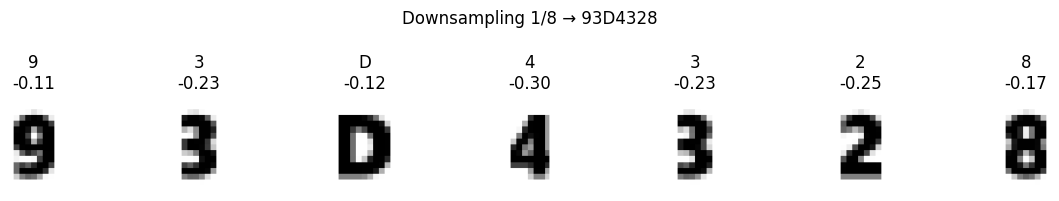

Downsample 1/8 → Recognized: 93D4328


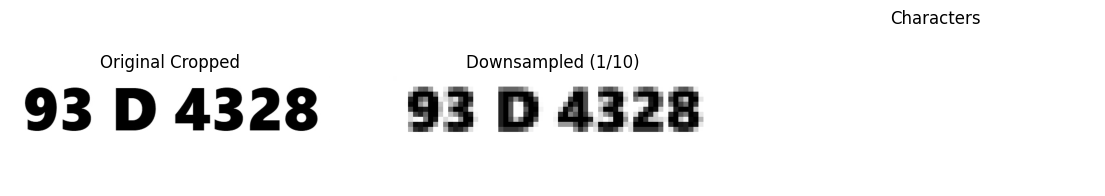

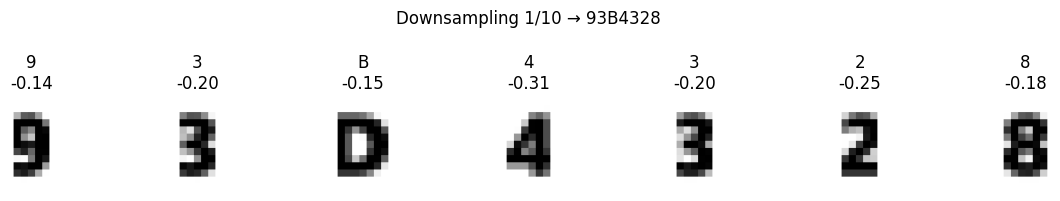

Downsample 1/10 → Recognized: 93B4328


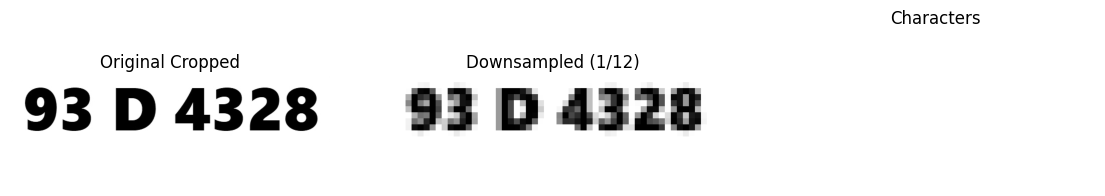

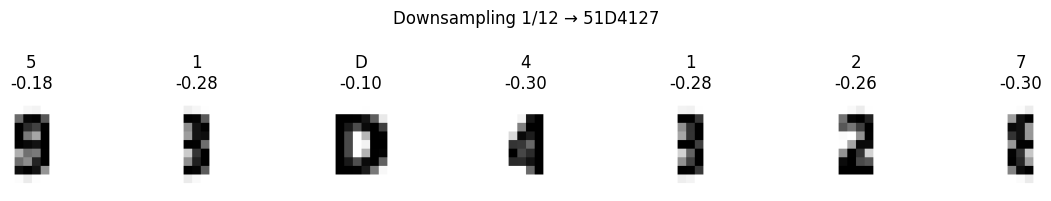

Downsample 1/12 → Recognized: 51D4127


In [19]:
for image in ['p1' , 'p2' , 'p3' , 'p4'] : 
    print(f"\n--- Downsampling Analysis on {image}.jpg ---\n")
    img = read_gray(f'ideal/{image}.jpg')
    cropped = crop(img, **CROP_SETTINGS)
    true_plate = ''
    for j, ch in enumerate(segment_by_cuts(cropped, cut_settings[image])):
        ch = crop_and_pad_bw_image(ch)
        bin_ch = threshold(ch)
        ch_prepped = center_align(bin_ch)
        best_score, best_char = -1, '?'
        candidate_set = letters if j == 2 else numbers
        for label, tmpl in candidate_set.items():
            score = ncc_masked(ch_prepped, tmpl)
            if score > best_score:
                best_score = score
                best_char = label
        true_plate += best_char

    downsample_rates = [2, 4, 6, 8, 10, 12]
    min_usable_rate = None

    for rate in downsample_rates:
        scale = 1 / rate
        small = cv2.resize(cropped, (0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
        restored = cv2.resize(small, (cropped.shape[1], cropped.shape[0]), interpolation=cv2.INTER_NEAREST)
        segments = segment_by_cuts(restored, cut_settings['p1'])

        result = ''
        plt.figure(figsize=(14, 2))
        plt.subplot(1, 3, 1)
        plt.imshow(cropped, cmap='gray')
        plt.title("Original Cropped")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(restored, cmap='gray')
        plt.title(f"Downsampled (1/{rate})")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.axis('off')
        plt.title("Characters")

        fig2 = plt.figure(figsize=(12, 2))
        for j, ch in enumerate(segments):
            ch = crop_and_pad_bw_image(ch)
            bin_ch = threshold(ch)
            ch_prepped = center_align(bin_ch)
            best_score, best_char = -1, '?'
            candidate_set = letters if j == 2 else numbers
            for label, tmpl in candidate_set.items():
                score = ncc_masked(ch_prepped, tmpl)
                if score > best_score:
                    best_score = score
                    best_char = label

            result += best_char
            plt.subplot(1, 7, j + 1)
            plt.imshow(ch, cmap='gray')
            plt.title(f'{best_char}\n{score:.2f}')
            plt.axis('off')

        plt.suptitle(f'Downsampling 1/{rate} → {result}')
        plt.tight_layout()
        plt.show()

        print(f"Downsample 1/{rate} → Recognized: {result}")
        if result == true_plate and min_usable_rate is None:
            min_usable_rate = rate


Estimated ( p1 ): 0.9920
[np.float32(0.9858476), np.float32(0.98571473), np.float32(0.98562425), np.float32(0.98423326), np.float32(0.96409315), np.float32(0.9779661), np.float32(0.9867134), np.float32(0.9861597), np.float32(0.9857949), np.float32(0.9844153), np.float32(0.9756248), np.float32(0.9900299), np.float32(0.99605054), np.float32(0.98506355), np.float32(0.9698642), np.float32(0.9903722), np.float32(0.99449456), np.float32(0.9946107), np.float32(0.9946416), np.float32(0.99477947), np.float32(0.99483097), np.float32(0.99493915), np.float32(0.9949767), np.float32(0.9950292), np.float32(0.99503845), np.float32(0.995075), np.float32(0.9951067), np.float32(0.9951388), np.float32(0.99516195), np.float32(0.9951704), np.float32(0.9951508), np.float32(0.995132), np.float32(0.9950487), np.float32(0.99485534), np.float32(0.9948989), np.float32(0.9948144), np.float32(0.99465364), np.float32(0.99460804), np.float32(0.9947818), np.float32(0.9948908), np.float32(0.9949741), np.float32(0.99509

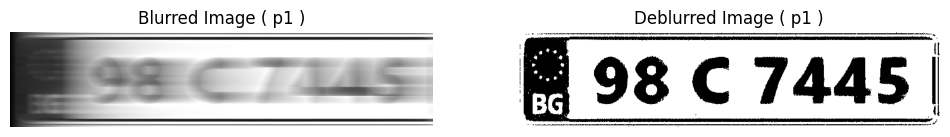

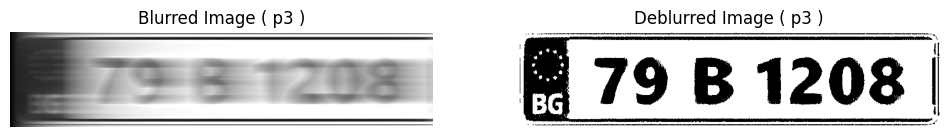

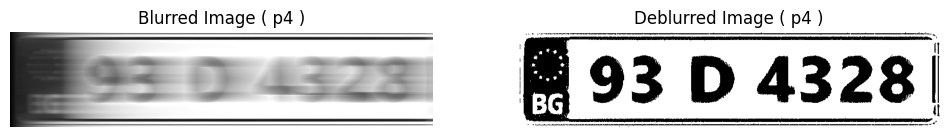

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

def estimate_p_rowwise(image):
    """Estimate p for each row of a blurred image."""
    ps = []
    for row in image:
        row = row - np.mean(row)  # zero-mean
        R0 = np.mean(row * row)
        R1 = np.mean(row[:-1] * row[1:])
        p = R1 / R0 if R0 != 0 else 0
        ps.append(p)
    return np.mean(ps) , ps  # average across rows

def deblur_rowwise(image, p):
    """Apply inverse filtering row-wise to deblur the image."""
    deblurred = np.zeros_like(image)
    b = [1]        # numerator (inverse of (1 - p) in H(z))
    a = [1, -p]     # denominator of inverse filter: y[n] - p*y[n-1] = x[n]
    for i in range(image.shape[0]):
        deblurred[i, :] = lfilter(a, b, image[i, :])
    return deblurred
def smoothen(image):
    kernel = np.array([
        [0.1, 0.1, 0.1],
        [0.1, 1.0, 0.1],
        [0.1, 0.1, 0.1]
    ])
    kernel /= kernel.sum()
    return cv2.filter2D(image, -1, kernel)

def sharpen(image):
    kernel = np.array([
    [-0.1, -0.1, -0.1],
    [-0.1,  1.8, -0.1],  # Center > 1 to boost edges
    [-0.1, -0.1, -0.1]
])
    return cv2.filter2D(image, -1, kernel)

def brighten_by_threshold(image, threshold=130):
    result = image.copy()
    result[result >= threshold] = 255
    result[result < 255] = 0
    return result
def contrast_stretch(image):
    min_val = np.min(image)
    max_val = np.max(image)
    stretched = (image - min_val) * (255.0 / (max_val - min_val))
    return np.clip(stretched, 0, 255).astype(np.uint8)

def compute_otsu_threshold(image):
    thresh_val,_ = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh_val
def remove_isolated_black_pixels(image):
    
    assert image.ndim == 2 and image.dtype == np.uint8, "Expected 2D binary image with dtype=uint8"

    # Make a copy to avoid modifying the original
    cleaned = image.copy()

    rows, cols = image.shape

    # Iterate over each pixel, excluding border
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            if image[i, j] == 0:
                # Get the 3x3 neighborhood
                neighborhood = image[i-1:i+2, j-1:j+2]
                # Count surrounding white pixels (excluding center)
                surrounding = np.delete(neighborhood.flatten(), 4)
                if np.all(surrounding == 255):
                    cleaned[i, j] = 255  # Replace isolated black pixel with white

    return cleaned


for img in ['p1' , 'p3' , 'p4'] : 
    # Load the blurred image (grayscale)
    img_path = f"realistic\{img}.jpg"  # Replace with your path
    blurred_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE).astype(np.float32)

    # Step 1: Estimate blur parameter p
    p_est , ps = estimate_p_rowwise(blurred_img)
    print(f"Estimated ( {img} ): {p_est:.4f}")
    print(ps)
    # Step 2: Deblur using inverse filtering
    deblurred_img = deblur_rowwise(blurred_img, p_est)

   # Normalize for display
    blurred_disp = cv2.normalize(blurred_img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    deblurred_disp = cv2.normalize(deblurred_img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    #print(deblurred_disp)
    deblurred_disp = smoothen(deblurred_disp)
    #print(deblurred_disp)
    deblurred_disp = contrast_stretch(deblurred_disp)
    #print(deblurred_disp)
    treshold = compute_otsu_threshold(deblurred_disp) + 5
    print('treshold is : ')
    print(treshold)
    deblurred_disp = brighten_by_threshold(deblurred_disp , treshold)
    deblurred_disp = remove_isolated_black_pixels(deblurred_disp)
    cv2.imwrite(f'realistic_deblurred\deblurred_{img}.jpg', deblurred_disp)

    # Show results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title(f"Blurred Image ( {img} )")
    plt.imshow(blurred_disp, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f"Deblurred Image ( {img} )")
    plt.imshow(deblurred_disp, cmap='gray')
    plt.axis('off')

plt.show()


Estimated p (column-wise): 0.9802
treshold is : 
112.0


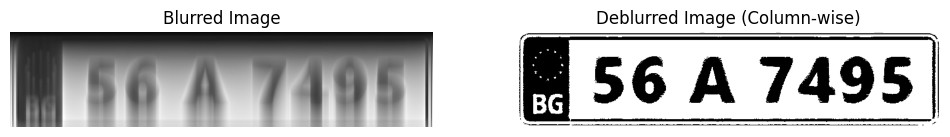

In [3]:
def estimate_p_columnwise(image):
    """Estimate p for each column of a blurred image."""
    ps = []
    for col in image.T:  # Transpose to iterate over columns
        col = col - np.mean(col)  # zero-mean
        R0 = np.mean(col * col)
        R1 = np.mean(col[:-1] * col[1:])
        p = R1 / R0 if R0 != 0 else 0
        ps.append(p)
    return np.mean(ps)  # average across columns

def deblur_columnwise(image, p):
    """Apply inverse filtering column-wise to deblur the image."""
    deblurred = np.zeros_like(image)
    b = [1]        # numerator (for inverse)
    a = [1, -p]    # denominator of inverse filter: y[n] - p*y[n-1] = x[n]
    for j in range(image.shape[1]):
        deblurred[:, j] = lfilter(a, b, image[:, j])
    return deblurred


# Load the blurred image (grayscale)
img_path = "realistic\p2.jpg"  # Replace with actual image path
blurred_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE).astype(np.float32)

# Step 1: Estimate blur parameter p (column-wise)
p_est = estimate_p_columnwise(blurred_img)
print(f"Estimated p (column-wise): {p_est:.4f}")

# Step 2: Deblur using inverse filtering
deblurred_img = deblur_columnwise(blurred_img, p_est)


# Normalize for display
blurred_disp = cv2.normalize(blurred_img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
deblurred_disp = cv2.normalize(deblurred_img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
#print(deblurred_disp)
deblurred_disp = smoothen(deblurred_disp)
#print(deblurred_disp)
deblurred_disp = contrast_stretch(deblurred_disp)
#print(deblurred_disp)
treshold = compute_otsu_threshold(deblurred_disp)
print('treshold is : ')
print(treshold)
deblurred_disp = brighten_by_threshold(deblurred_disp , treshold)
deblurred_disp = remove_isolated_black_pixels(deblurred_disp)
cv2.imwrite('realistic_deblurred\deblurred_p2.jpg', deblurred_disp)



# Show results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Blurred Image")
plt.imshow(blurred_disp, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Deblurred Image (Column-wise)")
plt.imshow(deblurred_disp, cmap='gray')
plt.axis('off')

plt.show()


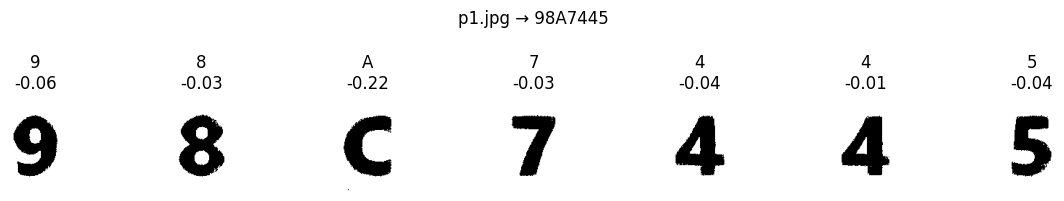

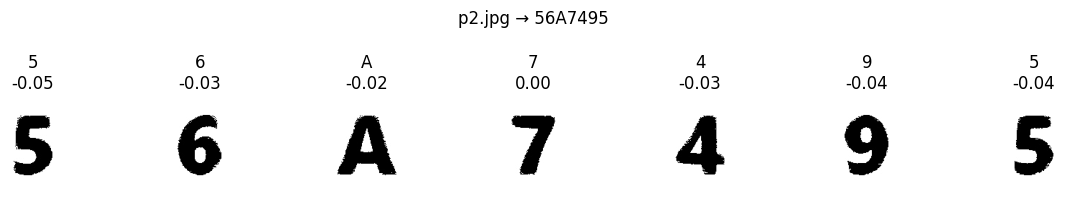

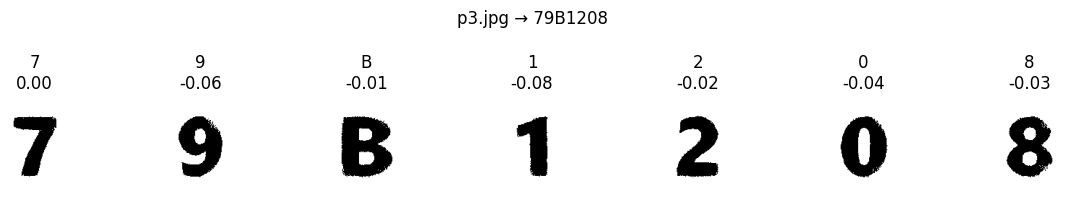

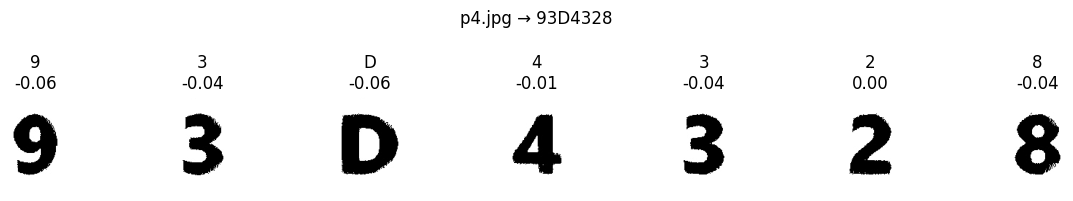

In [7]:
# Cropping margins
CROP_SETTINGS = {'t': 20, 'b': 20, 'l': 100, 'r': 20}

# Plate-specific segmentation cut settings
cut_settings = {
    'p1': [0.16, 0.29, 0.46, 0.61, 0.73, 0.85],
    'p2': [0.15, 0.30, 0.46, 0.63, 0.75, 0.85],
    'p3': [0.17, 0.30, 0.46, 0.59, 0.71, 0.822],
    'p4': [0.15, 0.30, 0.46, 0.63, 0.73, 0.85],
}

# Load templates
letters = load_templates('letters')
numbers = load_templates('numbers')
templates = {**letters, **numbers}

# Recognize characters from p1–p4 using cut-based segmentation
for plate in ['p1', 'p2', 'p3', 'p4']:
    path = f'realistic_deblurred\deblurred_{plate}.jpg'
    img = read_gray(path)
    cropped = crop(img, **CROP_SETTINGS)
    segments = segment_by_cuts(cropped, cut_settings[plate])

    plt.figure(figsize=(12, 2))
    result = ''
    for j, ch in enumerate(segments):
        ch = crop_and_pad_bw_image(ch)
        bin_ch = threshold(ch)
        ch_prepped = center_align(bin_ch)

        best_score, best_char = -1, '?'
        candidate_set = letters if j == 2 else numbers

        for label, tmpl in candidate_set.items():
            score = ncc_masked(ch_prepped, tmpl)
            if score > best_score:
                best_score = score
                best_char = label
        result += best_char
        plt.subplot(1, 7, j+1)
        plt.imshow(ch, cmap='gray')
        plt.axis('off')
        plt.title(f'{best_char}\n{best_score:.2f}')
    
    plt.suptitle(f'{plate}.jpg → {result}')
    plt.tight_layout()
    plt.show()


--- Downsampling Analysis on p1.jpg ---



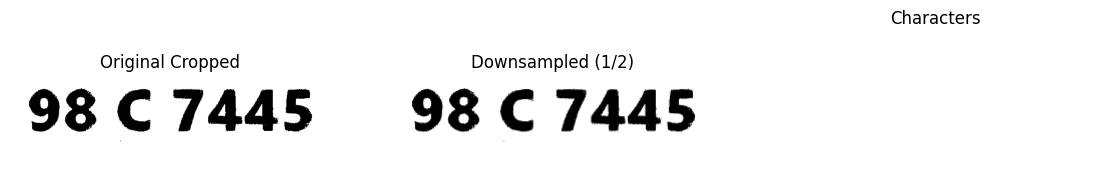

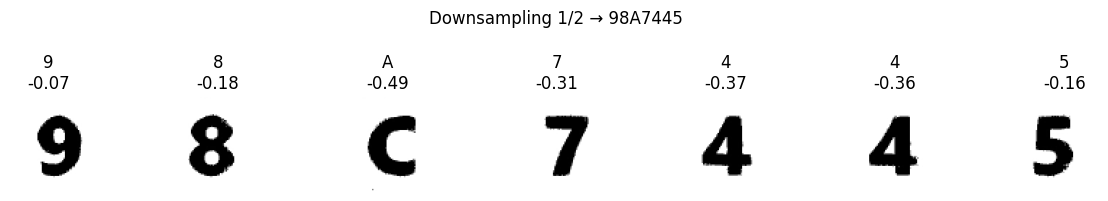

Downsample 1/2 → Recognized: 98A7445


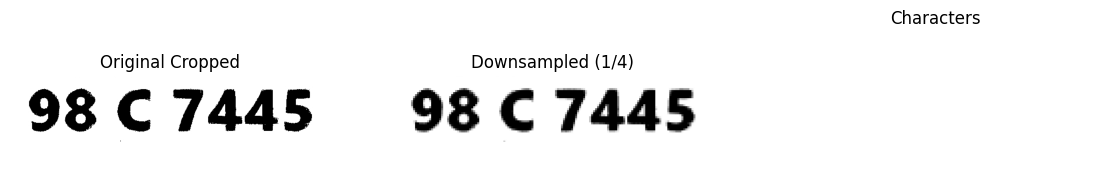

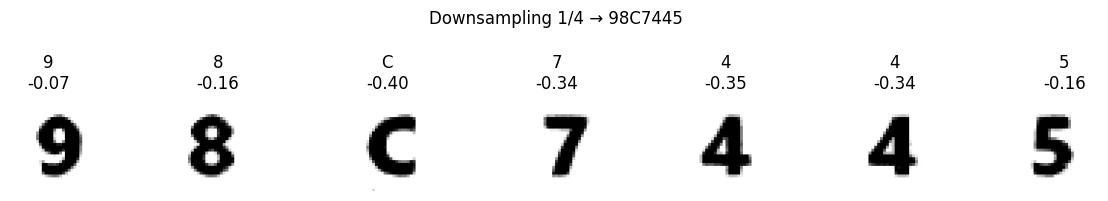

Downsample 1/4 → Recognized: 98C7445


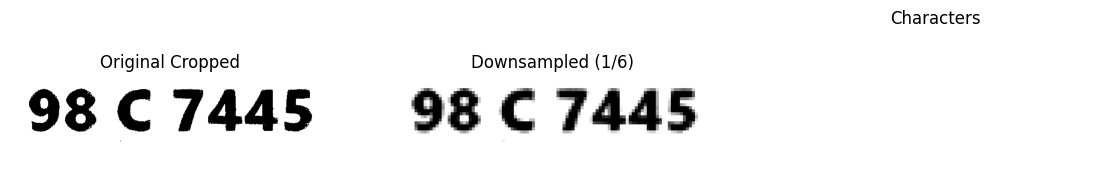

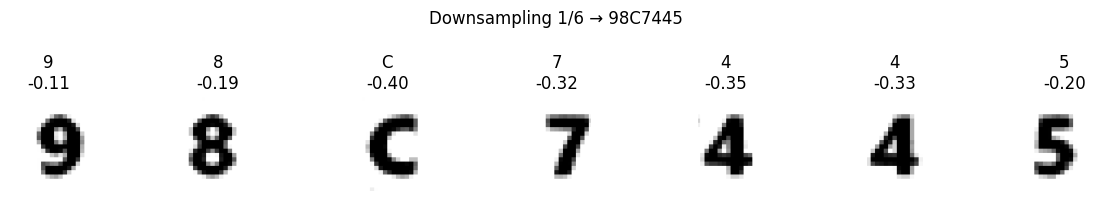

Downsample 1/6 → Recognized: 98C7445


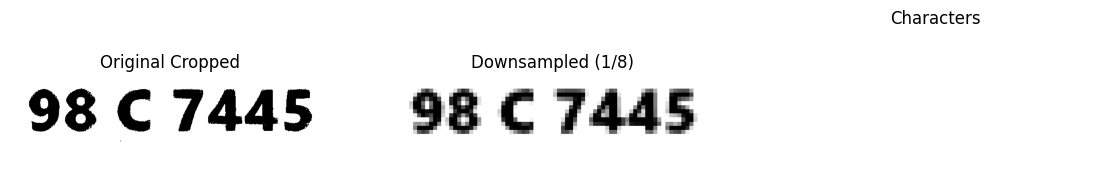

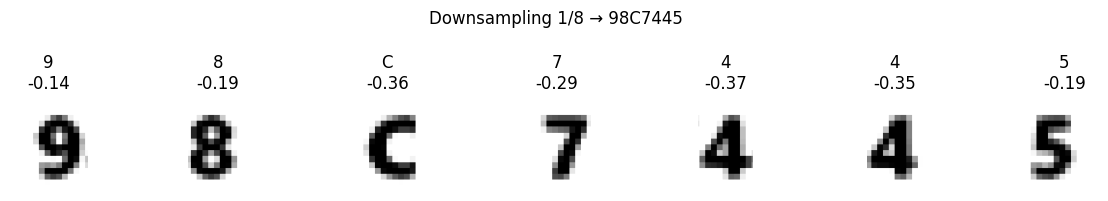

Downsample 1/8 → Recognized: 98C7445


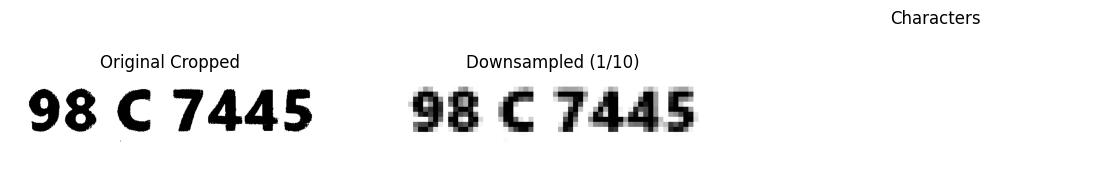

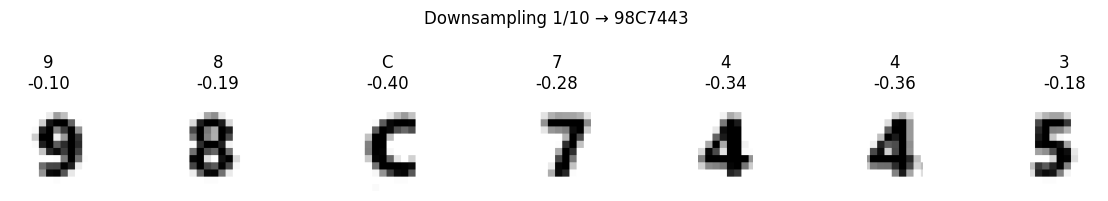

Downsample 1/10 → Recognized: 98C7443


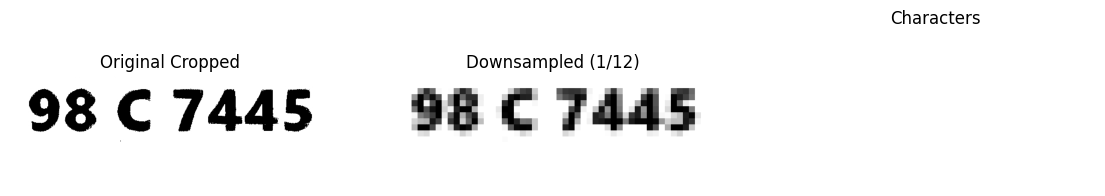

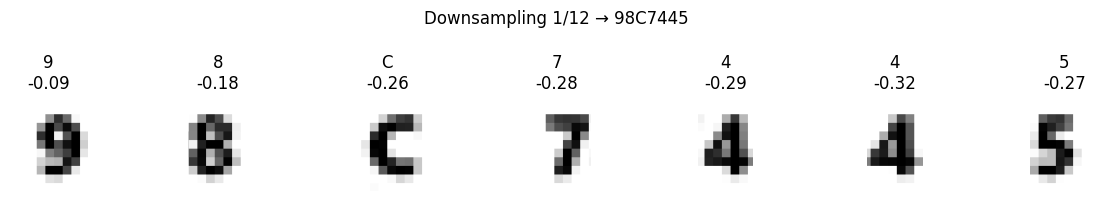

Downsample 1/12 → Recognized: 98C7445


In [14]:
print("\n--- Downsampling Analysis on p1.jpg ---\n")
img = read_gray('realistic_deblurred\deblurred_p1.jpg')
cropped = crop(img, **CROP_SETTINGS)
true_plate = ''
for j, ch in enumerate(segment_by_cuts(cropped, cut_settings['p1'])):
    bin_ch = threshold(ch)
    ch_prepped = center_align(bin_ch)
    best_score, best_char = -1, '?'
    candidate_set = letters if j == 2 else numbers
    for label, tmpl in candidate_set.items():
        score = ncc_masked(ch_prepped, tmpl)
        if score > best_score:
            best_score = score
            best_char = label
    true_plate += best_char

downsample_rates = [2, 4, 6, 8, 10, 12]
min_usable_rate = None

for rate in downsample_rates:
    scale = 1 / rate
    small = cv2.resize(cropped, (0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
    restored = cv2.resize(small, (cropped.shape[1], cropped.shape[0]), interpolation=cv2.INTER_NEAREST)
    segments = segment_by_cuts(restored, cut_settings['p1'])

    result = ''
    plt.figure(figsize=(14, 2))
    plt.subplot(1, 3, 1)
    plt.imshow(cropped, cmap='gray')         
    plt.title("Original Cropped")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(restored, cmap='gray')
    plt.title(f"Downsampled (1/{rate})")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.axis('off')
    plt.title("Characters")

    fig2 = plt.figure(figsize=(12, 2))
    for j, ch in enumerate(segments):
        bin_ch = threshold(ch)
        ch_prepped = center_align(bin_ch)
        best_score, best_char = -1, '?'
        candidate_set = letters if j == 2 else numbers
        for label, tmpl in candidate_set.items():
            score = ncc_masked(ch_prepped, tmpl)
            if score > best_score:
                best_score = score
                best_char = label

        result += best_char
        plt.subplot(1, 7, j + 1)
        plt.imshow(ch, cmap='gray')
        plt.title(f'{best_char}\n{score:.2f}')
        plt.axis('off')

    plt.suptitle(f'Downsampling 1/{rate} → {result}')
    plt.tight_layout()
    plt.show()

    print(f"Downsample 1/{rate} → Recognized: {result}")
    if result == true_plate and min_usable_rate is None:
        min_usable_rate = rate